# <center>Setting up TF-IDF in Python and Scikit Learn</center>

1) Importing the required libraries<br>
2) Preparing the data properly<br>
3) Setting up TF-IDF with Scikit Learn<br>

In [2]:
import json


def load_data(file):
    with open (file, "r", encoding="utf-8") as f:
        data = json.load(f) 
    return (data)

In [4]:
trc_data = load_data("data/trc_dn.json")

In [5]:
names = trc_data["names"]
descriptions = trc_data["descriptions"]

In [7]:
print (names[0])
print (descriptions[0])
print (len(names))
print (len(descriptions))

AARON, Thabo Simon
An ANCYL member who was shot and severely injured by SAP members at Lephoi, Bethulie, Orange Free State (OFS) on 17 April 1991. Police opened fire on a gathering at an ANC supporter's house following a dispute between two neighbours, one of whom was linked to the ANC and the other to the SAP and a councillor.
21747
21747


## Cleaning the Data

In [9]:
import string
from nltk.corpus import stopwords
import re

def remove_stops(text, stops):
    #uses regex to remove all AC numbers
    text = re.sub(r"AC\/\d{1,4}\/\d{1,4}", "", text)
    
    #removes all stop words, including months
    words = text.split()
    final = []
    for word in words:
        if word not in stops:
            final.append(word)
            
    #reassembles the text without stop words
    final = " ".join(final)
    
    #removes all punctuation
    final = final.translate(str.maketrans("", "", string.punctuation))
    
    #removes all numbers
    final = "".join([i for i in final if not i.isdigit()])
    
    #eliminates double white spaces
    while "  " in final:
        final = final.replace("  ", " ")
    return (final)

def clean_docs(docs):
    #gets the NLTK's stopword list for English
    stops = stopwords.words("english")
    
    #Grabs all the months from data/months.json
    months = load_data("data/months.json")
    
    #combines the two to make a master stopword list
    stops = stops+months
    
    #empty new list to store the cleaned docs
    final = []
    
    #iterate over all docs and cleans them to be a
    #single sentence with no unwanted words
    for doc in docs:
        clean_doc = remove_stops(doc, stops)
        final.append(clean_doc)
    
    return (final)

Now comes the time to clean all of our documents. We will use one line of code to pass all descriptions to clean_docs().

In [10]:
cleaned_docs = clean_docs(descriptions)

After cleaning my documents, I always find it is good to print off a sample of the before and after to see that my functions are working as intended. So, let's do that here.

In [13]:
print ("Original Text:")
print (descriptions[0]+"\n")

print ("Cleaned Text:")
print (cleaned_docs[0])

Original Text:
An ANCYL member who was shot and severely injured by SAP members at Lephoi, Bethulie, Orange Free State (OFS) on 17 April 1991. Police opened fire on a gathering at an ANC supporter's house following a dispute between two neighbours, one of whom was linked to the ANC and the other to the SAP and a councillor.

Cleaned Text:
An ANCYL member shot severely injured SAP members Lephoi Bethulie Orange Free State OFS Police opened fire gathering ANC supporters house following dispute two neighbours one linked ANC SAP councillor


As we can see from these two outputs, the original text has been heavily altered and cleaned. Notice, for example, the removal of the date. Now that we have the data fully cleaned, it is time to begin setting up the TF-IDF algorithm with Scikit-Learn.

## Implementing TF-IDF in Python

Implementing TF-IDF in Python requires us to import a few things from the Scikit Learn library. Remember, in Python Scikit Learn is "sklearn". So, let's import those things now.

In [16]:
# A lot of this section comes from the Scikit Learn documentation and various blogs including the following:
#https://towardsdatascience.com/applying-machine-learning-to-classify-an-unsupervised-text-document-e7bb6265f52
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [17]:
vectorizer = TfidfVectorizer(
                                lowercase=True,
                                max_features=100,
                                max_df=0.8,
                                min_df=5,
                                ngram_range = (1,3),
                                stop_words = "english"

                            )

Now that we have created the vectorizer, let's pass our documents to the algorithm with the method fit_transform(). This will pass all documents to the algorithm and vectorize them.

In [18]:
vectors = vectorizer.fit_transform(cleaned_docs)

Here, we can see the results of the vectors of the first document. This output is a tuple which indicates the keyword and the TF-IDF score. In this form, however, it is a bit hard to decipher. 

In [72]:
print (vectors[0])

  (0, 5)	0.31417904033665145
  (0, 37)	0.26764577237075254
  (0, 92)	0.17885669660417403
  (0, 2)	0.35997263491995035
  (0, 71)	0.27507572242905154
  (0, 54)	0.20314225251689294
  (0, 77)	0.5249891606885219
  (0, 42)	0.24755257133949066
  (0, 80)	0.3047379292177127
  (0, 82)	0.19595009171387526
  (0, 53)	0.28809076545860496


In [23]:
feature_names = vectorizer.get_feature_names()

By using the method get_feature_names(), we can get an easier to read text representation of our key words. Let's look at the most common first.

In [24]:
print (feature_names[0])

allegedly


In [26]:
dense = vectors.todense()

By using the method todense(), we can convert that vector into a larger representation and each word's TF-IDF score. Each number corresponds to a word. Those words that are keywords have a TF-IDF score, while those represented by 0 are words that did not make it into our max_features. In other words, they are irrelevant words.

In [27]:
print (dense[0])

[[0.         0.         0.35997263 0.         0.         0.31417904
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.26764577 0.         0.         0.         0.
  0.24755257 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.28809077
  0.20314225 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.27507572
  0.         0.         0.         0.         0.         0.52498916
  0.         0.         0.30473793 0.         0.19595009 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.1788567  0.         0.         0.
  0.    

To work with this data, let's reconvert it into a list with the command below.

In [28]:
denselist = dense.tolist()

This is what that same data looks like when printed off as a list. Again, this is our first document represented with its TF-IDF scores for each word.

In [30]:
print (denselist[0])

[0.0, 0.0, 0.35997263491995035, 0.0, 0.0, 0.31417904033665145, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.26764577237075254, 0.0, 0.0, 0.0, 0.0, 0.24755257133949066, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.28809076545860496, 0.20314225251689294, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.27507572242905154, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5249891606885219, 0.0, 0.0, 0.3047379292177127, 0.0, 0.19595009171387526, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.17885669660417403, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [31]:
all_keywords = []
for description in denselist:
    x=0
    keywords = []
    for word in description:
        if word > 0:
            keywords.append(feature_names[x])
        x=x+1
    all_keywords.append(keywords)

Let's take a look at what we have been able to do to our document 0 by looking at its original state, cleaned state, and just the key words.

In [73]:
print ("Original Text:")
print (descriptions[0]+"\n")

print ("Cleaned Text:")
print (cleaned_docs[0]+"\n")

print ("Only Keywords Text:")
print (all_keywords[0])

Original Text:
An ANCYL member who was shot and severely injured by SAP members at Lephoi, Bethulie, Orange Free State (OFS) on 17 April 1991. Police opened fire on a gathering at an ANC supporter's house following a dispute between two neighbours, one of whom was linked to the ANC and the other to the SAP and a councillor.

Cleaned Text:
An ANCYL member shot severely injured SAP members Lephoi Bethulie Orange Free State OFS Police opened fire gathering ANC supporters house following dispute two neighbours one linked ANC SAP councillor

Only Keywords Text:
['anc', 'anc supporters', 'house', 'injured', 'member', 'members', 'police', 'sap', 'severely', 'shot', 'supporters']


## K-Means Clustering

In [34]:
true_k = 5

model = KMeans(n_clusters=true_k, init="k-means++", max_iter=100, n_init=1)

In [35]:
model.fit(vectors)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [45]:
print (order_centroids)

[[92  2 39 17 64 22 88 35 60 41 37 11 72 43 73 29  6  3  5 49 25 50 87 44
   9 98  8 47 48 21 89 26  0 52 46 36 93 23 65 38 74 42 40 66 59 18 30 31
  82 19 75 51 12 32 58 96 28 99 80 68 76 54 70 53 13 14 84 97 20 45 10 69
   1 71 86 95 90 33 34 24 81 15 83 78 77 16  4 55  7 94 27 61 56 63 62 67
  79 85 91 57]
 [83 24 82 90  2  4 91 88 39  3 92 60 41 64 22 54 49 72 59 50  5  6 11  0
  73 96 29 42 46 40 53 84 75 71 43 68 77 66 65 97 30 23 74 31 35 58 93 98
  44 32 76 20 12 55 51 70 45 99 86 47 48 28 37 69  1 87 80 13 25 17 95 21
  34 33 56 78 67 38 15 16 36 26 10  8 63 62 61  7 14 18  9 19 52 79 27 81
  94 89 85 57]
 [85 61 62 63 51 65  8 13 50 49 29 19 18 41 39 17 64 38 92 37 89  3  2 88
  36 35 22 73 72  6 74 23  9 11 40 26  5 52 82 24 83 93 46 66 90  4 59 43
   0 76 91 12 14 42 68 87 70 32 25 84 54 44 53 80 58 98 28 71 81 77 10 16
  34 55 33  1 69 60 47 86 67  7 48 94 45 96 97 95 79 56 15 78 20 21 57 75
  27 30 31 99]
 [54 77 55 71 20 82 27 14 53 80 94 59 96 81 42  7 15 10 58 88 95  2

Let's look at the first word from the first cluster, number 92. We can find that word by looking it up in our terms list.

In [70]:
print (terms[92])

supporters


In [52]:
i = 0
for cluster in order_centroids:
    print (f"Cluster {i}")
    for keyword in cluster[0:10]:
        print (terms[keyword])
    print ("")
    i=i+1

Cluster 0
supporters
anc
ifp
burnt
near
conflict
supporter
home
natal
ifp supporters

Cluster 1
shot dead
dead
shot
supporter shot
anc
anc supporter shot
supporter shot dead
supporter
ifp
anc supporter

Cluster 2
sonkombo
ndwedwe
ndwedwe kwazulu
ndwedwe kwazulu near
kwazulu near durban
near durban
arson
attacks
kwazulu near
kwazulu

Cluster 3
members
sap
members sap
police
cape
shot
detained
beaten
member
severely

Cluster 4
amnesty
mk
granted
granted amnesty
operatives
injured
mk operatives
killed
people
security



In [8]:
%%html
<div align="center">
<iframe width="560" height="315" src="https://www.youtube.com/embed/i74DVqMsRWY" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</div>

## Plotting the Data

In [1]:
#A lot of this section was obtained from https://stackoverflow.com/questions/27494202/how-do-i-visualize-data-points-of-tf-idf-vectors-for-kmeans-clustering

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [55]:
kmean_indices = model.fit_predict(vectors)

pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(vectors.toarray())

In [65]:
colors = ["r", "b", "m", "y", "c"]

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]

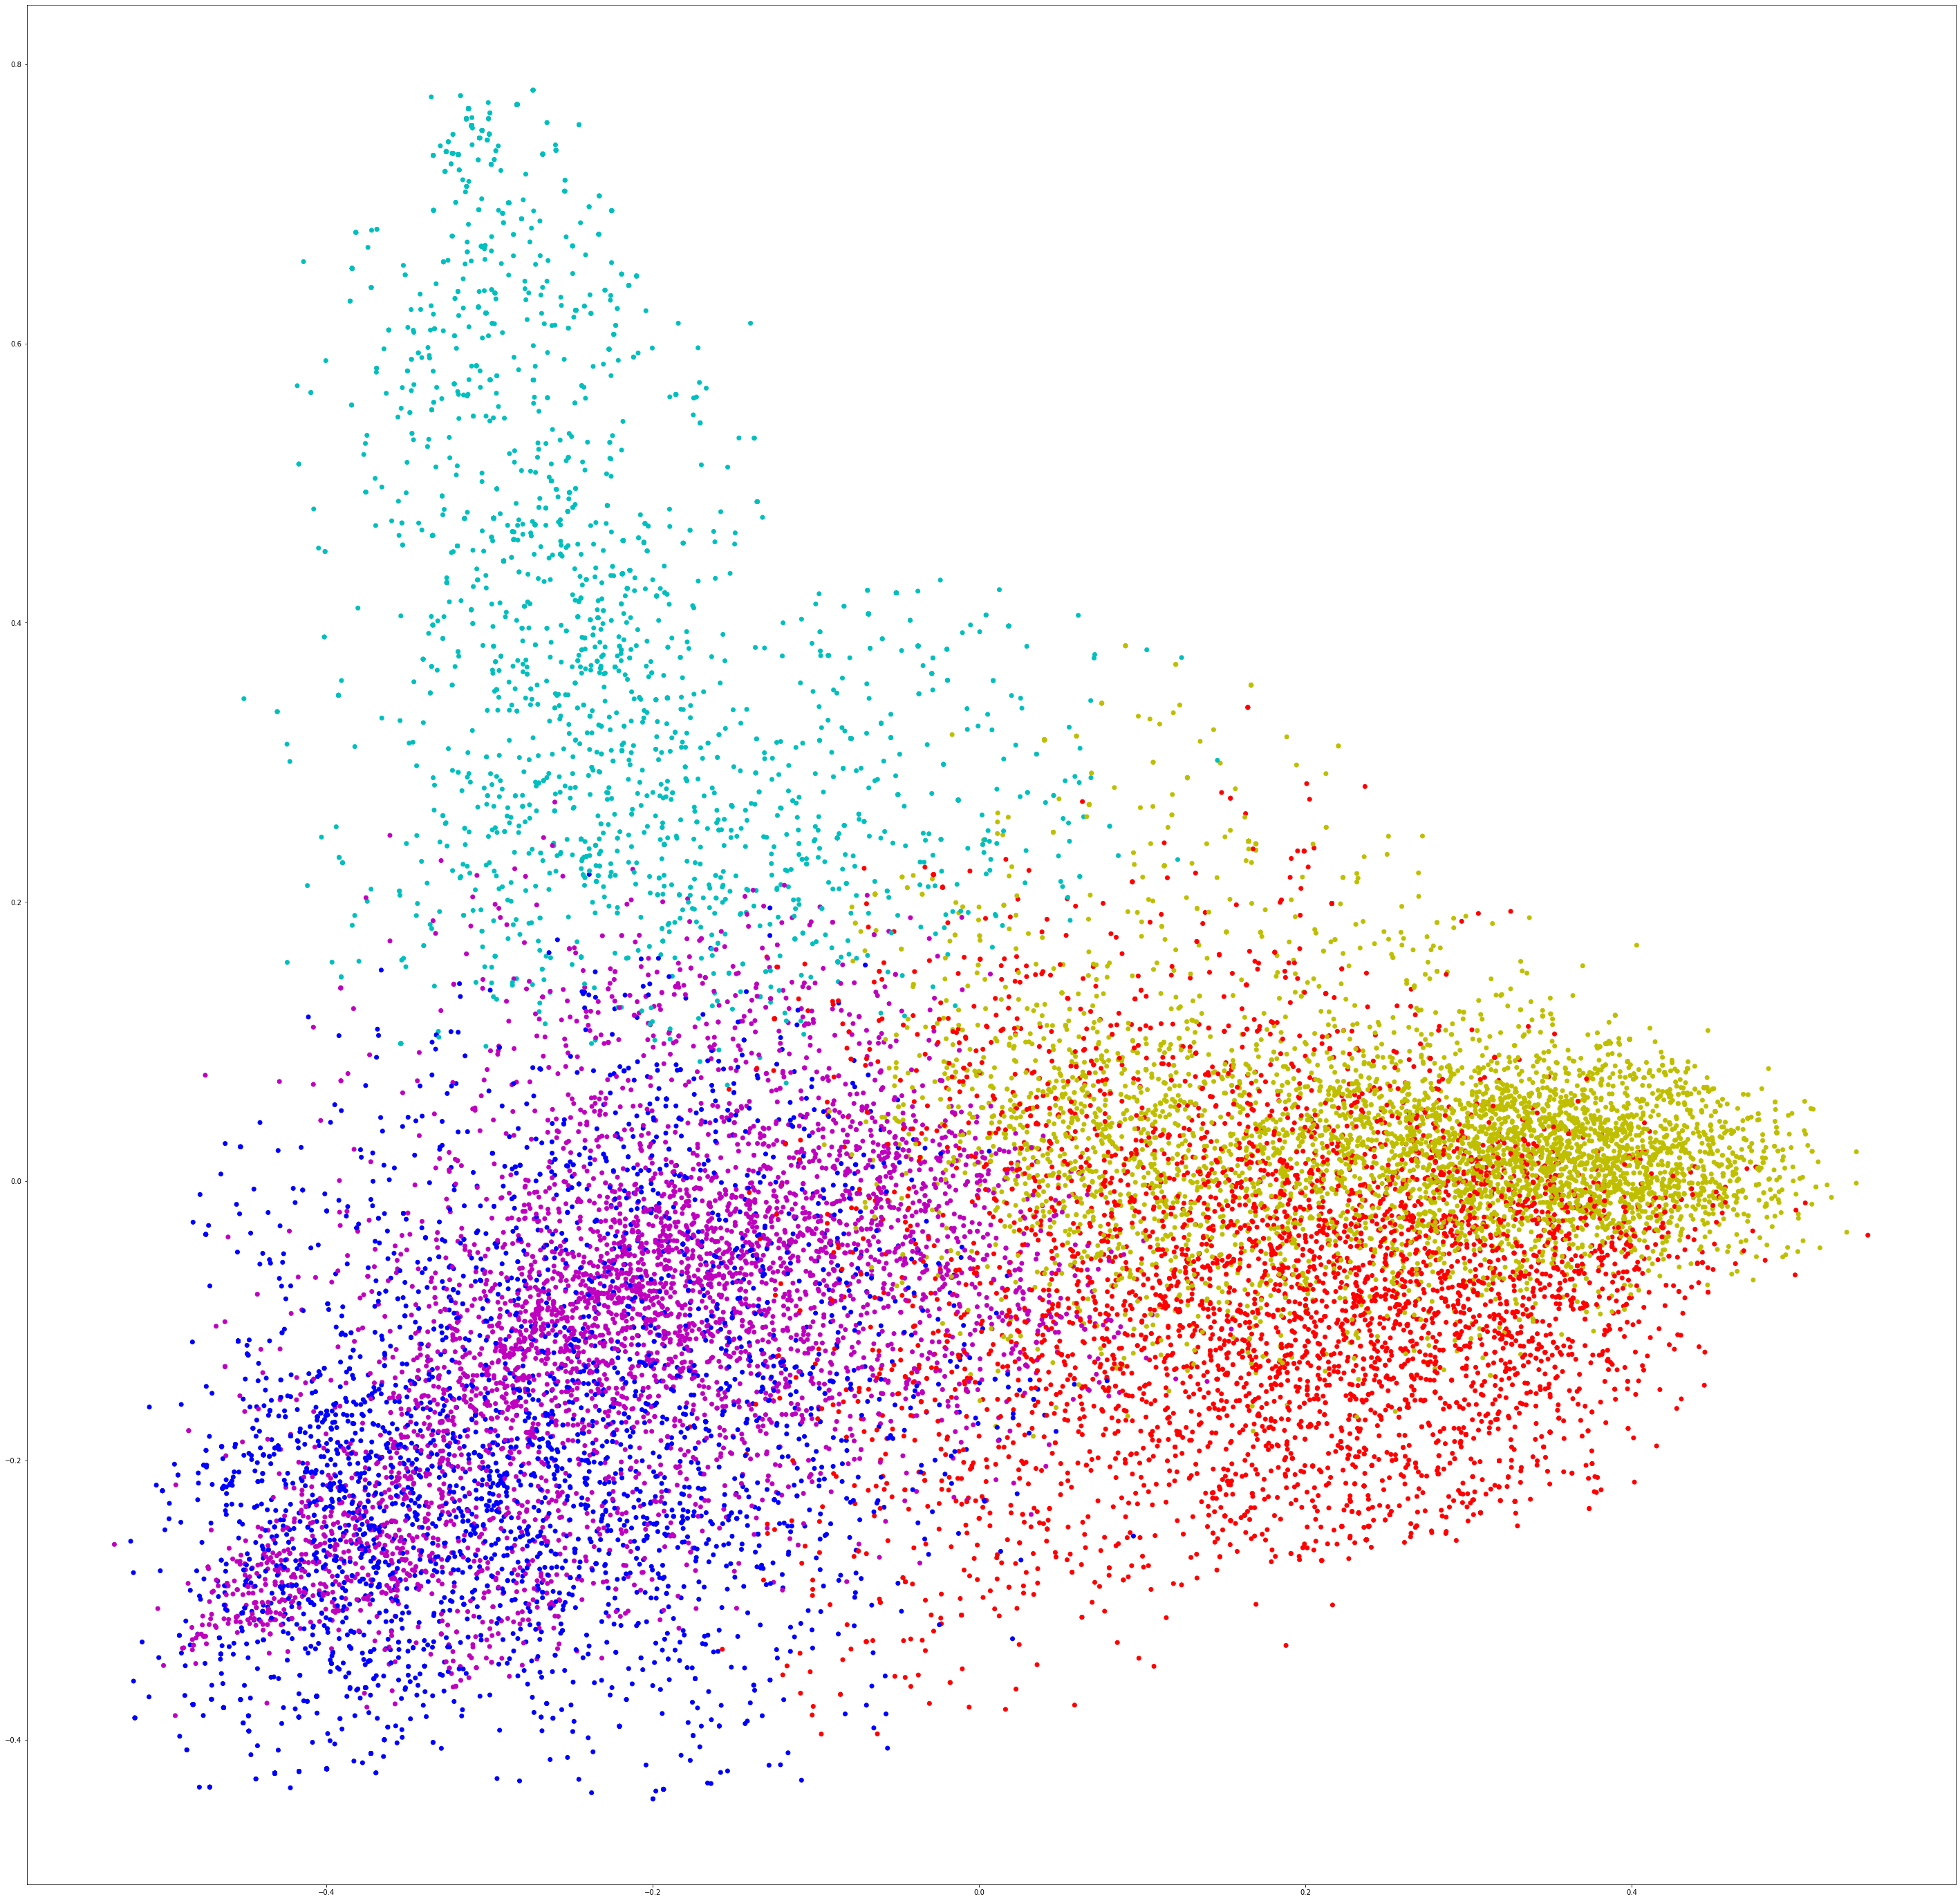

In [66]:
fig, ax = plt.subplots(figsize=(50, 50))
ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmean_indices])

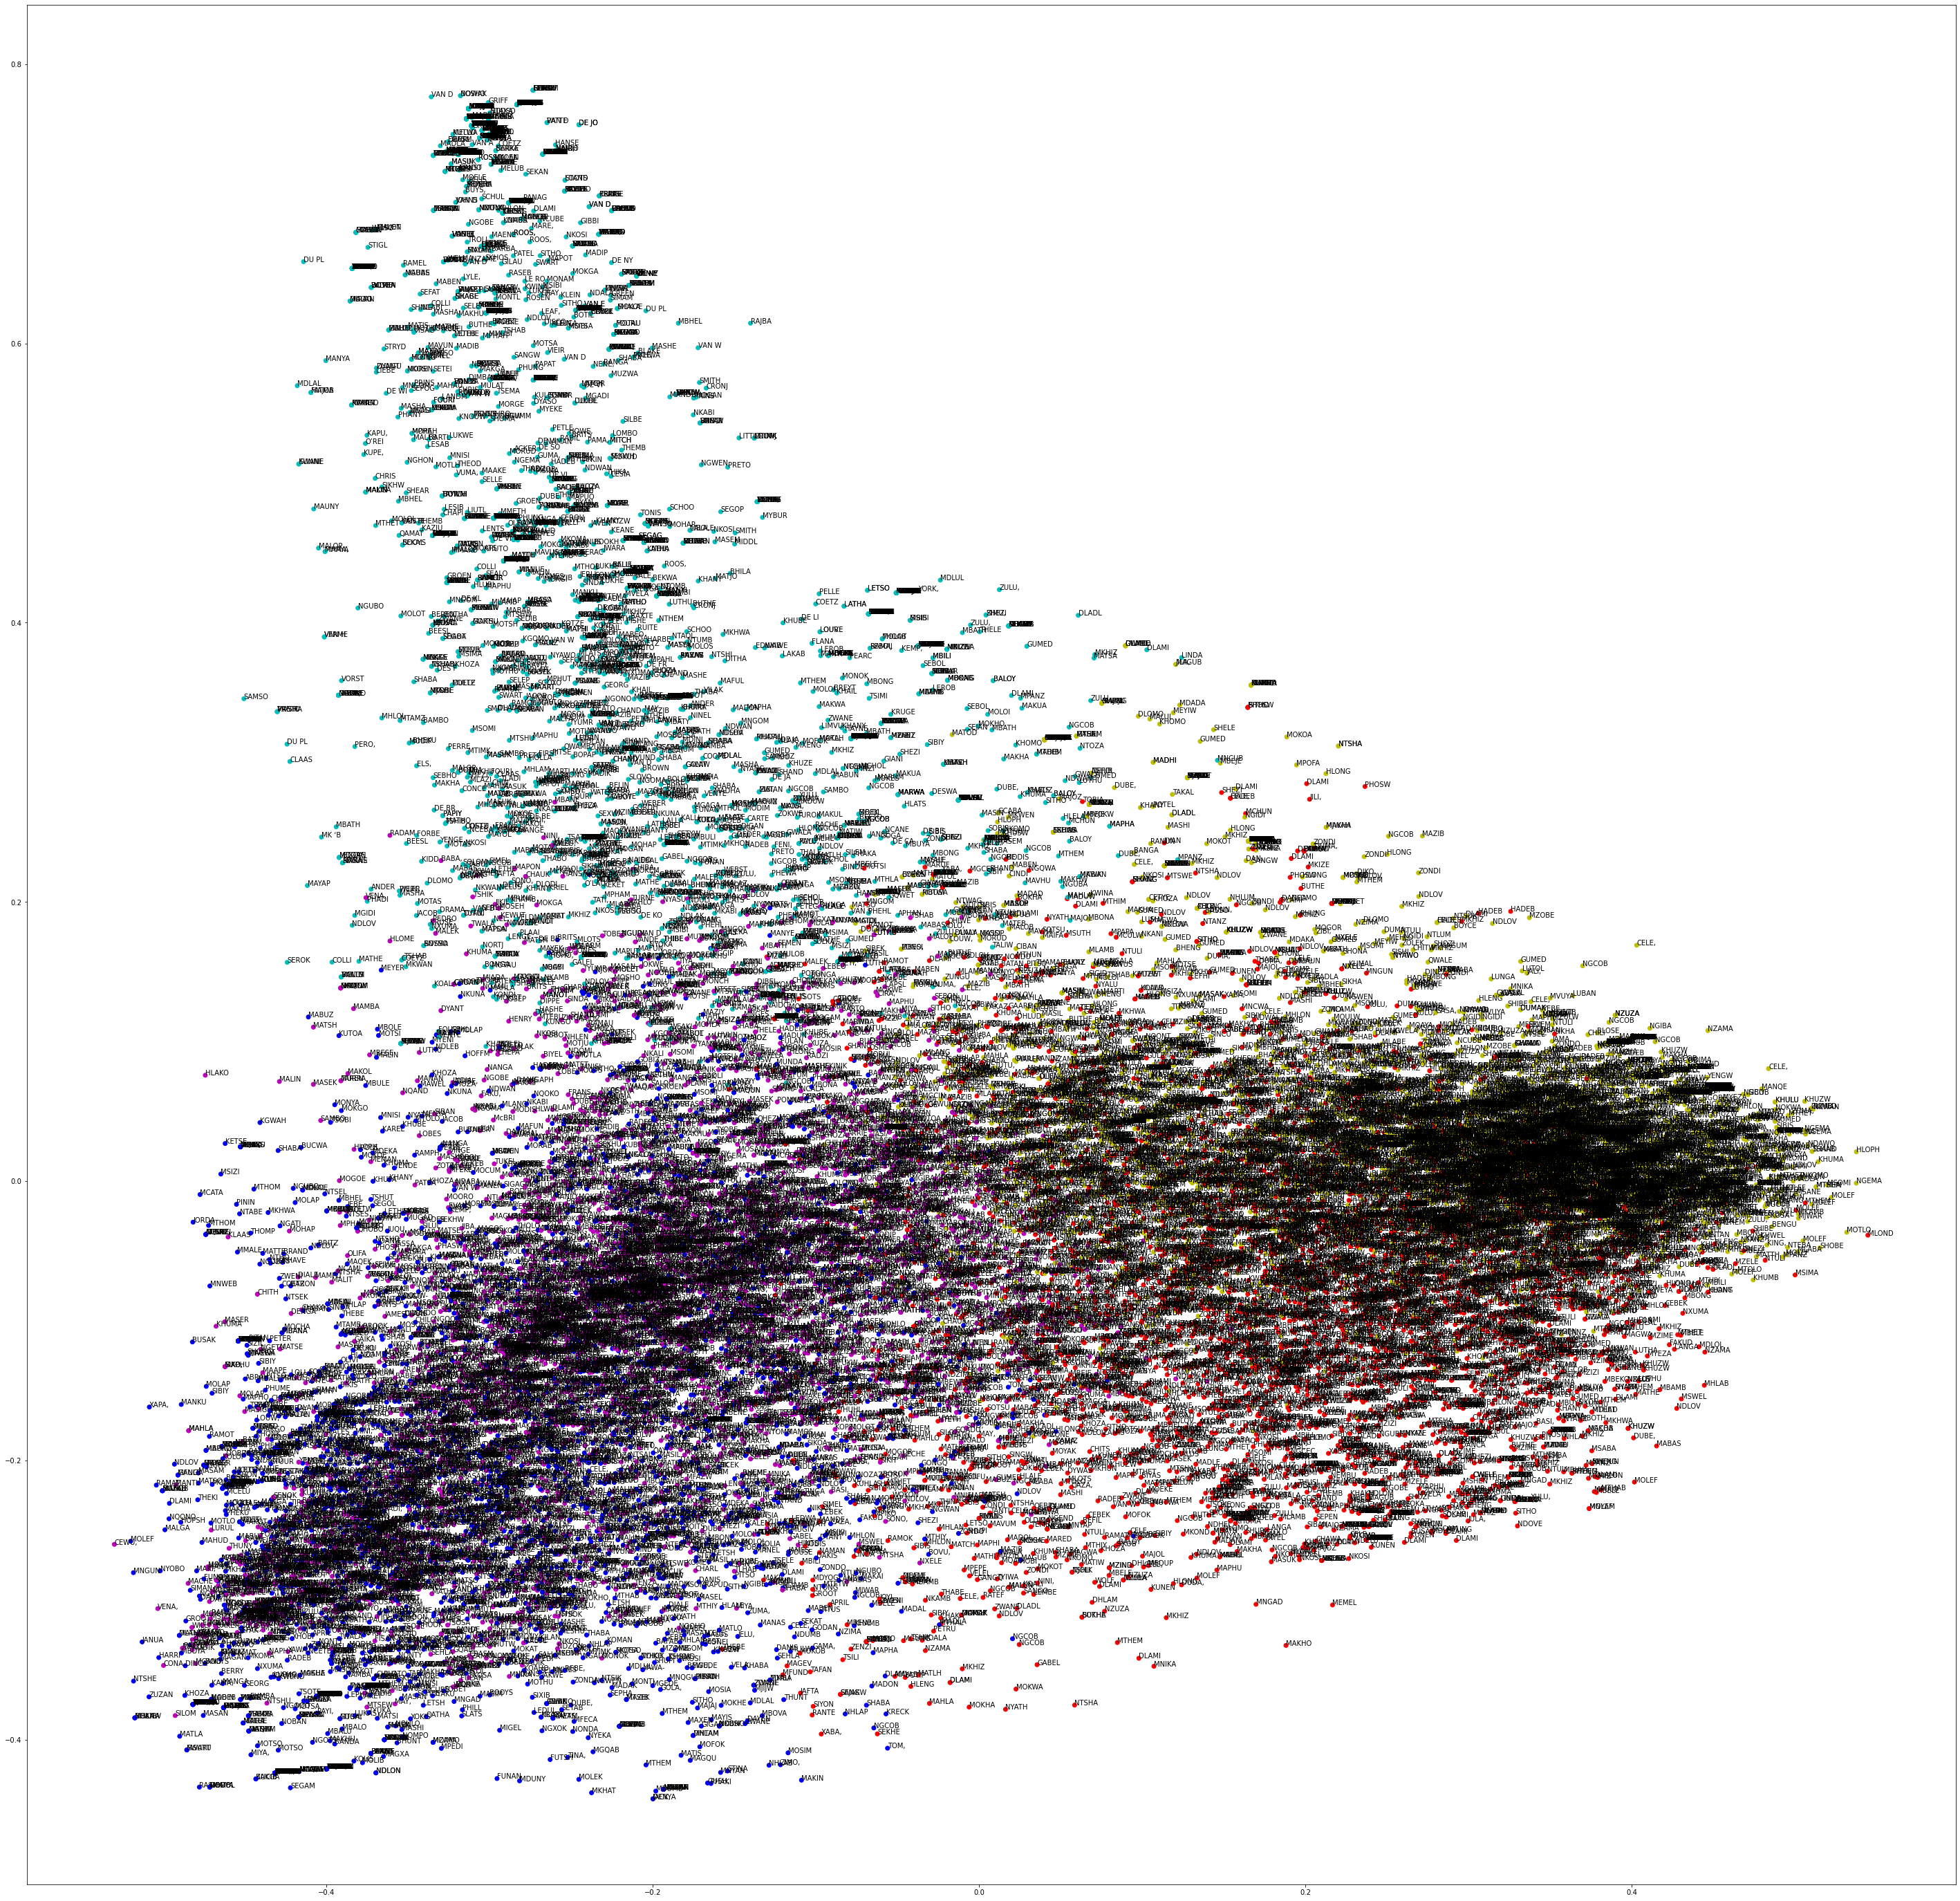

In [67]:
fig, ax = plt.subplots(figsize=(50, 50))
ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmean_indices])
for i, txt in enumerate(names):
    ax.annotate(txt[0:5], (x_axis[i], y_axis[i]))

In [68]:
%%html
<div align="center">
<iframe width="560" height="315" src="https://www.youtube.com/embed/B0BkUNMqfSo" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</div>